<a href="https://colab.research.google.com/github/TonyLau0524/Python-Project---Web-Scraping/blob/main/Python_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests beautifulsoup4 requests-html

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.0 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=9482c1330365b93f8964198c02eb83fdec6e6a380aeaaf4045b5de652ab52892
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
import numpy as np
import nltk.data
from requests_html import HTMLSession
from bs4 import BeautifulSoup
import requests

### **Simple Web Scraping**


In [ ]:
base_url = 'https://www.imdb.com/search/title/?groups=top_1000&start='
step = 50

In [ ]:
filmlist = []

In [ ]:
for i in range(1,1000,step):
  url = f'{base_url}{i}&ref_=adv_nxt'
  html_content = requests.get(url).text
  soup = BeautifulSoup(html_content, 'lxml')
  film_info = soup.find_all('div', class_ = 'lister-item mode-advanced')

  for film in film_info:

        film_title = film.h3.a.text
        film_year = film.h3.select_one('span:last-of-type').text.split()[-1]
        film_category = film.find('span', class_='genre').get_text(strip=True)
        film_time = film.find('span', class_='runtime').get_text()

        film_ratings = film.find('span', class_='certificate')
        if film_ratings:
           film_ratings = film.find('span', class_='certificate').get_text()
        else:
           film_ratings = "Not Rated"

        p_tag = film.find('p', class_='')

        # Extract text from the <p> element
        p_text = p_tag.get_text()

        # Split the text by "|"
        sections = p_text.split('|')
        director_names = []
        star_names = []

        for section in sections:
          if "Director:" in section:
              # Extract directors if "Director:" is in this section
              director_section = section.replace("Director:", "")
              director_names.extend([director.strip() for director in director_section.split(',')])
          elif "Directors:" in section:
              # Extract directors if "Directors:" is in this section
              director_section = section.replace("Directors:", "")
              director_names.extend([director.strip() for director in director_section.split(',')])
          elif "Stars:" in section:
              # Extract stars if "Stars:" is in this section
              star_section = section.replace("Stars:", "")
              star_names.extend([star.strip() for star in star_section.split(',')])

        votes_span = film.find('span', string='Votes:')

        # Check if the "Votes:" span is found and extract the associated number
        if votes_span:
            # Navigate to the next sibling, which is the span containing the number
            votes_number = votes_span.find_next('span', attrs={"name": "nv"})

            if votes_number:
                votes_value = votes_number.text

            else:
                votes_value = "Number of votes not found."
        else:
            votes_value = "Number of votes not found."
        #film_gross = film.find_all(('span', {'name': 'nv', 'data-value': True})[-1]
        gross_span = film.find('span', string='Gross:')

        # Check if the "Votes:" span is found and extract the associated number
        if gross_span:
            # Navigate to the next sibling, which is the span containing the number
            gross_amount = gross_span.find_next('span', attrs={"name": "nv"})['data-value']

            if gross_amount:
                gross_value = gross_amount

            else:
                gross_value = "Gross not found"
        else:
            gross_value = "Gross not found"



        filmtable = {

            'title' : film_title,
            'year' : film_year,
            'category' : film_category,
            'time' : film_time,
            'ratings' : film_ratings,
            'director' : director_names,
            'stars' : star_names,
            'vote' : votes_value,
            'gross' : gross_value



        }
        filmlist.append(filmtable)


## **Create DataFrame**

In [ ]:
film_df = pd.DataFrame(filmlist)

In [ ]:
film_df

,title,year,category,time,ratings,director,stars,vote,gross
0,Killers of the Flower Moon,(2023),"Crime, Drama, History",206 min,R,[Martin Scorsese],"[Leonardo DiCaprio, Robert De Niro, Lily Glads...","63,401",Gross not found
1,Mission: Impossible - Dead Reckoning Part One,(2023),"Action, Adventure, Thriller",163 min,PG-13,[Christopher McQuarrie],"[Tom Cruise, Hayley Atwell, Ving Rhames, Simon...","175,274",Gross not found
2,Oppenheimer,(2023),"Biography, Drama, History",180 min,R,[Christopher Nolan],"[Cillian Murphy, Emily Blunt, Matt Damon, Robe...","471,124",Gross not found
3,The Nightmare Before Christmas,(1993),"Animation, Family, Fantasy",76 min,PG,[Henry Selick],"[Danny Elfman, Chris Sarandon, Catherine O'Har...","363,182","75,082,668"
4,The Exorcist,(1973),Horror,122 min,R,[William Friedkin],"[Ellen Burstyn, Max von Sydow, Linda Blair, Le...","442,340","232,906,145"
...,...,...,...,...,...,...,...,...,...
995,Sarfarosh,(1999),"Action, Crime, Drama",174 min,Not Rated,[John Mathew Matthan],"[Naseeruddin Shah, Aamir Khan, Sonali Bendre, ...","26,499",Gross not found
996,Drishyam 2,(2021),"Crime, Drama, Thriller",152 min,Not Rated,[Jeethu Joseph],"[Mohanlal, Meena, Ansiba, Esther Anil]","39,901",Gross not found
997,Drishyam,(2013),"Crime, Drama, Thriller",160 min,Not Rated,[Jeethu Joseph],"[Mohanlal, Meena, Asha Sharath, Ansiba]","43,229",Gross not found
998,Airlift,(2016),"Action, Drama, History",130 min,Not Rated,[Raja Menon],"[Akshay Kumar, Nimrat Kaur, Kumud Mishra, Prak...","58,303",Gross not found


## **Data Cleaning&Exploratory Data Analysis**

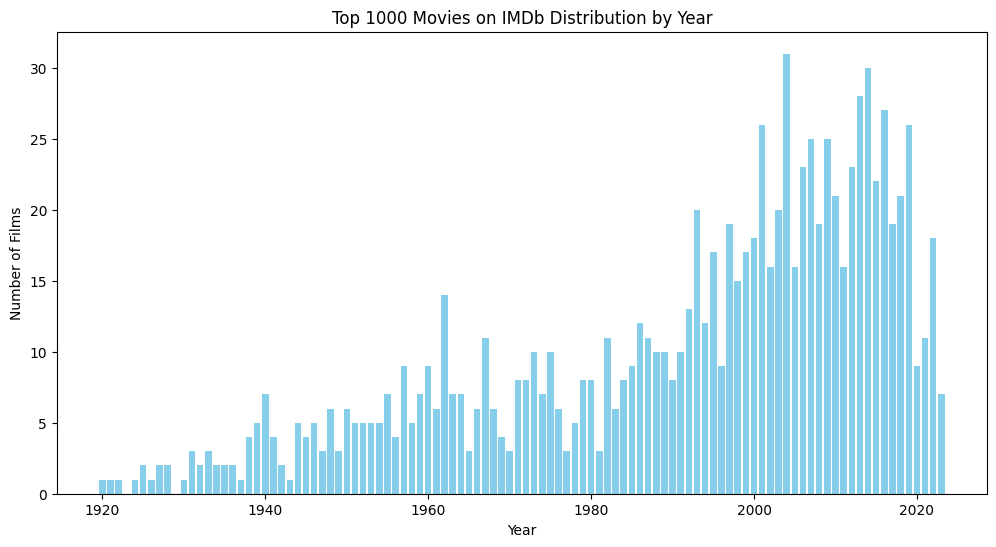

In [ ]:
film_df['year'] = film_df['year'].astype(str)

# Extract the 4-digit year from the 'year' column and convert it to float
film_df['year'] = film_df['year'].str.extract(r'(\d{4})').astype(float)

# Count the number of films per year and sort by year
year_counts = film_df['year'].value_counts().sort_index()

# Create a bar chart to visualize the count of films in different years
plt.figure(figsize=(12, 6))
plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.title('Top 1000 Movies on IMDb Distribution by Year')

plt.show()

The distribution of the top 1000 movies on IMDb by year reveals an interesting trend, as the majority of these highly-rated films fall within the two-decade span from 2000 to 2020. This concentration of movies in this period signifies a significant shift in the film industry and viewing preferences.

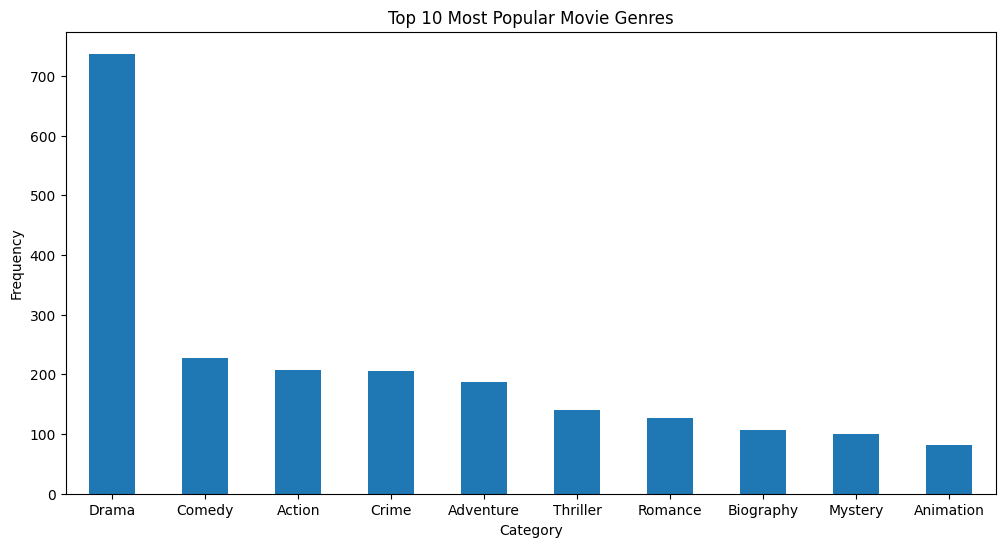

In [ ]:
categories = film_df['category'].str.split(', ').explode()

# Count the occurrences of each category
category_counts = categories.value_counts().head(10)

# Plot a histogram of category frequencies
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.title('Top 10 Most Popular Movie Genres')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

The list of the top 10 most popular movie genres, with drama at the forefront, followed by comedy, action, crime, and adventure, reflects the enduring appeal and evolving tastes of film enthusiasts.

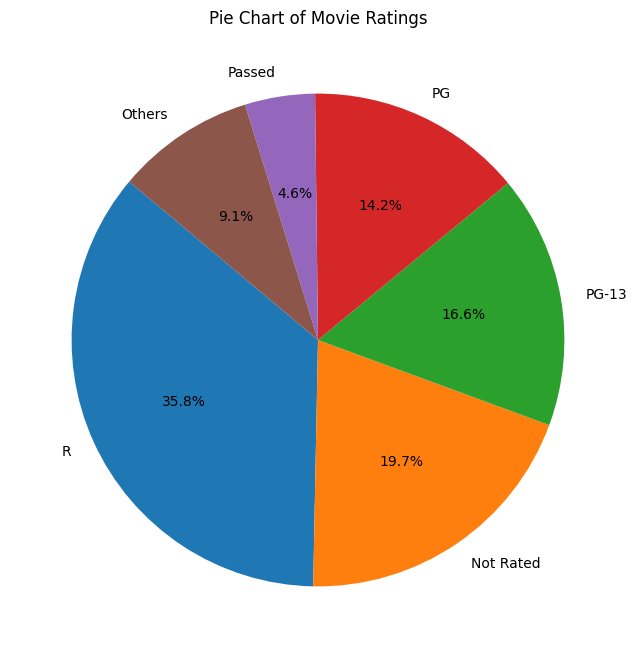

In [ ]:
ratings_counts = film_df['ratings'].value_counts()


# Select the top 5 ratings and their counts
top_5_ratings = ratings_counts.head(5)

# Calculate the count of all other ratings as "Others"
others_count = ratings_counts[5:].sum()

# Create a new series that combines the top 5 ratings and "Others" using pandas.concat
combined_ratings = pd.concat([top_5_ratings, pd.Series({'Others': others_count})])

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(combined_ratings, labels=combined_ratings.index, autopct='%1.1f%%', startangle=140,)
plt.title('Pie Chart of Movie Ratings')

plt.show()

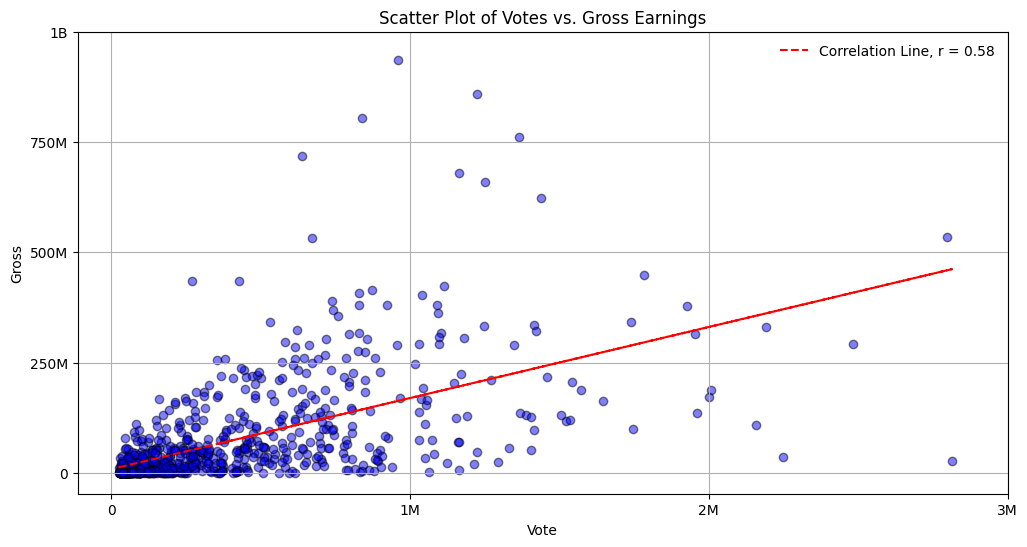

In [ ]:
film_df1 = film_df.copy()
film_df1 = film_df1[film_df1['gross'] != 'Gross not found']
film_df1['vote'] = film_df1['vote'].str.replace(',', '').astype(int)
film_df1['gross'] = film_df1['gross'].str.replace(',', '').astype(int)

correlation = film_df1['vote'].corr(film_df1['gross'])

# Create the scatter plot with a correlation line
plt.figure(figsize=(12, 6))
plt.scatter(film_df1['vote'], film_df1['gross'], alpha=0.5, color='b', edgecolors='k')


z = np.polyfit(film_df1['vote'], film_df1['gross'], 1)
p = np.poly1d(z)
plt.plot(film_df1['vote'], p(film_df1['vote']),'r--', label='Correlation Line, r = 0.58')

plt.title('Scatter Plot of Votes vs. Gross Earnings')
plt.xlabel('Votes')
plt.ylabel('Gross')
plt.grid(True)
plt.legend(loc='best', frameon=False)

x_ticks = [0, 1000000, 2000000, 3000000]
x_labels = ['0', '1M', '2M', '3M']
y_ticks = [0, 250000000, 500000000, 750000000, 1000000000]
y_labels = ['0', '250M', '500M', '750M', '1B']

plt.xticks(x_ticks, x_labels)
plt.yticks(y_ticks, y_labels)

plt.show()



In [ ]:
correlation = film_df1['vote'].corr(film_df1['gross'])

print("Correlation between 'vote' and 'gross':", correlation)

Correlation between 'vote' and 'gross': 0.5812370714990298


The correlation coefficient of 0.581 between vote and gross represents a moderately positive correlation. This correlation implies that there is a discernible relationship between the IMDb ratings of movies and their box office gross earnings, and the magnitude of 0.581 indicates that this relationship is relatively strong.

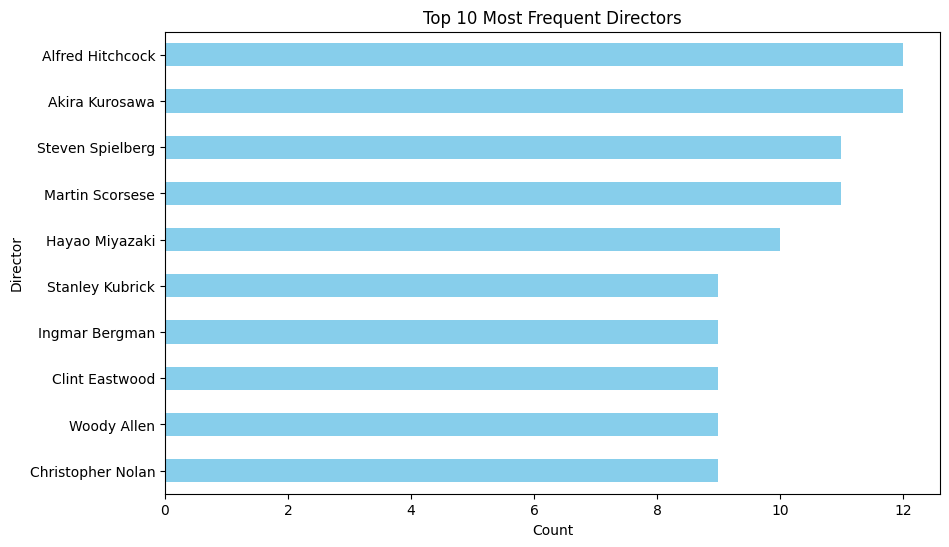

In [ ]:
film_df2 = film_df.copy()
film_df2['director'] = film_df2['director'].apply(lambda x: ', '.join(x))

# Create a list of all director names
all_directors = [director for directors in film_df2['director'] for director in directors.split(', ')]

# Count the occurrences of each director
director_counts = pd.Series(all_directors).value_counts()

# Get the top N most frequent directors (adjust N as needed)
top_n_directors = director_counts.head(10)

# Create a bar chart for the top N directors
plt.figure(figsize=(10, 6))
top_n_directors.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.ylabel('Director')
plt.xlabel('Count')
plt.title('Top 10 Most Frequent Directors')
plt.show()

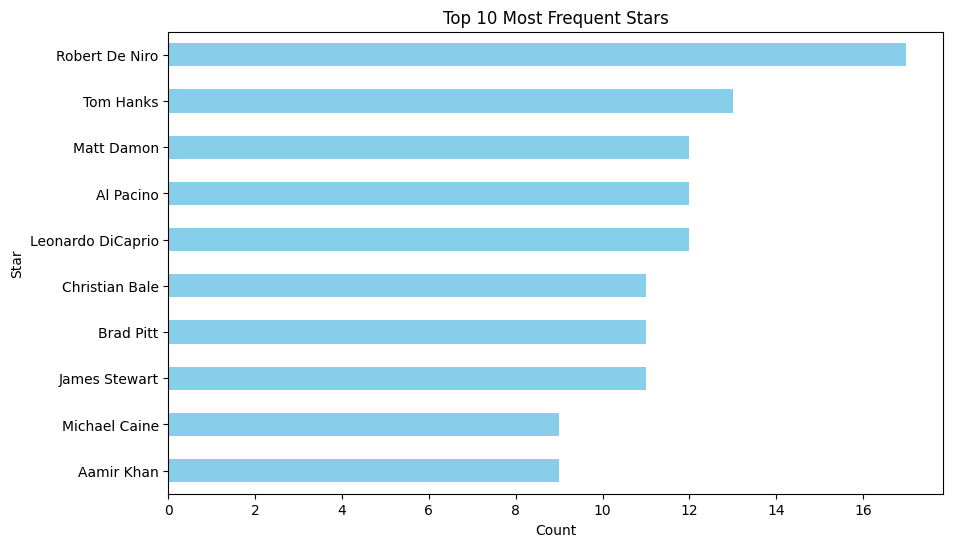

In [ ]:
film_df2 = film_df.copy()
film_df2['stars'] = film_df2['stars'].apply(lambda x: ', '.join(x))

# Create a list of all director names
all_stars = [star for stars in film_df2['stars'] for star in stars.split(', ')]

# Count the occurrences of each director
stars_counts = pd.Series(all_stars).value_counts()

# Get the top N most frequent directors (adjust N as needed)
top_n_stars = stars_counts.head(10)

plt.figure(figsize=(10, 6))
top_n_stars.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Star')
plt.title('Top 10 Most Frequent Stars')
plt.show()

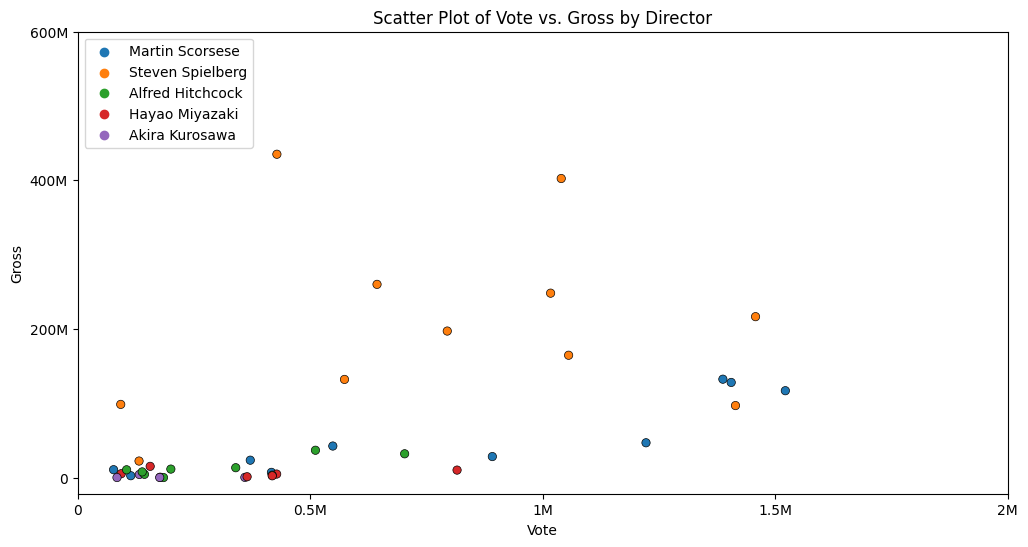

In [ ]:

top_director_names = director_counts.head(5).index.tolist()
filter_condition = film_df1['director'].str[0].isin(top_director_names)

# Apply the filter to get the filtered DataFrame
ff_df = film_df1[filter_condition]
filtered_directors_df = ff_df[ff_df['director'].apply(lambda directors: len(directors) == 1)]
filtered_directors_df_copy = filtered_directors_df.copy()
filtered_directors_df_copy['director'] = filtered_directors_df_copy['director'].str.join(', ')
plt.figure(figsize=(12, 6))
sns.scatterplot(x='vote', y='gross',hue='director', data=filtered_directors_df_copy, color='b', edgecolor='k')
plt.legend(loc='upper left')
plt.title('Scatter Plot of Vote vs. Gross by Director')
plt.xlabel('Vote')
plt.ylabel('Gross')
x_ticks = [0,500000, 1000000,1500000, 2000000]
x_labels = ['0','0.5M', '1M','1.5M', '2M']
y_ticks = [0, 200000000, 400000000, 600000000]
y_labels = ['0', '200M', '400M', '600M']

plt.xticks(x_ticks, x_labels)
plt.yticks(y_ticks, y_labels)

plt.show()


The Scatter Plot of Vote vs. Gross by Director, where the data points are dominated by Steven Spielberg, showcases a compelling trend in the film industry. It highlights that movies directed by Steven Spielberg tend to receive both higher votes and higher box office gross earnings compared to other directors.

## **Conclusion**
The data tells us that between 2000 and 2020, there were a lot of highly-rated movies. People really like drama films. A good chunk of movies are for grown-ups (R-rated), and some don't have any ratings. If a movie gets a high rating on IMDb, it often makes a lot of money at the box office. Steven Spielberg is really good at making movies that people love and pay to see. Also, directors like Alfred Hitchcock and Akira Kurosawa have made many great films. And the actor Robert De Niro has been in a lot of really good movies too. All in all, the data shows us what kinds of movies people enjoy and which filmmakers and actors are really successful in the movie business.